In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

%matplotlib inline
sns.set(color_codes=True)

myen2 = pd.read_csv('energydata_complete.csv', error_bad_lines = False)
myen2

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [2]:
scaler = MinMaxScaler()
mydata = myen2.drop(columns=['date', 'lights'])
normalised_data2 = pd.DataFrame(scaler.fit_transform(mydata), columns=mydata.columns)
features_data = normalised_data2
target_data = normalised_data2['Appliances']

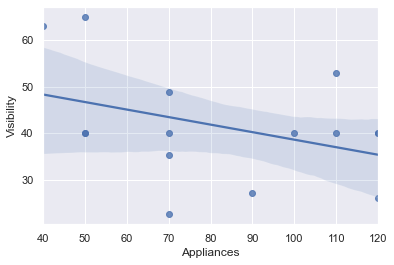

In [3]:
mydatareg = mydata[['Appliances', 'Visibility']].sample(15, random_state=42)
sns.regplot(x="Appliances", y="Visibility",
            data=mydatareg)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(features_data, target_data, train_size = 0.7, test_size=0.3, random_state=42)
Regressor = LinearRegression()
Regressor.fit(x_train, y_train)
y_pred = Regressor.predict(x_test)

In [5]:
#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred).round(3)
print(mae)

0.0


In [23]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred).round(2)
print(r2_score)

1.0


In [7]:
#Residual sum of squares
rss = np.sum(np.square(y_test - y_pred)).round(3)
print(rss)

0.0


In [30]:
#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
print(rmse)

0.0


In [31]:
#Display Coefficients
print(Regressor.coef_)

[ 1.00000000e+00  5.73910303e-18  7.28017331e-17 -3.67769506e-16
 -3.23927832e-16 -5.51781704e-17 -2.42065160e-16  7.24009763e-17
 -7.22990440e-17  1.98884444e-16 -4.14905245e-17 -3.52834630e-17
 -2.28931217e-16  2.69238220e-17  1.05853750e-16  1.23953737e-16
  7.05228254e-17  1.34062714e-16  1.55908085e-16 -7.10272968e-17
  3.95544204e-17  3.20859553e-16 -8.40805975e-17 -1.48429468e-16
  1.21205830e-16 -6.08595209e-17 -6.08595209e-17]


In [32]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [39]:
#feature selection and lasso regression L1
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
print(rmse)

0.01


In [42]:
#ridge regression L2
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

y_pred = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(3)
print(rmse)

0.0


In [35]:
linear_model_weights = get_weights_df(Regressor, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,T2,-3.677695e-16,-0.000732,0.000000
1,RH_2,-3.239278e-16,-0.001493,-0.000000
2,RH_3,-2.420652e-16,0.000346,0.000000
3,RH_6,-2.289312e-16,0.000129,-0.000000
4,Visibility,-1.484295e-16,0.000044,0.000000
5,Windspeed,-8.408060e-17,0.000110,0.000000
6,RH_4,-7.229904e-17,0.000089,0.000000
7,T_out,-7.102730e-17,-0.000952,0.000000
8,rv1,-6.085952e-17,0.000003,-0.000000
9,rv2,-6.085952e-17,0.000003,-0.000000


In [36]:
Regressor.fit(x_train, y_train)

LinearRegression()